Below we are importing pandas, and numpy
Then declaring the set1

In [3]:
import pandas as pd
import numpy as np

set1 = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")
set2 = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")
method1Data = set1['total.counts']


Now we need to divide set1 into 2 batches for the first and last 4 months

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Filter data for months 1+2+3+4
cond01 = ((set1['year'] == 2004) & (set1['month'].between(1, 4)))
batch01 = set1[cond01]
batch01x = batch01['x.pos.asec'].values
batch01y = batch01['y.pos.asec'].values
batch01TotalCount = batch01['total.counts'].values

# Min-Max Scaled
batch01Min = batch01TotalCount.min()
batch01Max = batch01TotalCount.max()
batch01Scaled = (batch01TotalCount - batch01Min) / (batch01Max - batch01Min)

# normalized data
batch01Mean = batch01TotalCount.mean()
batch01StdDev = batch01TotalCount.std()
batch01Normalized = (batch01TotalCount - batch01Mean) / batch01StdDev


# Filter data for months 21+22+23+24
cond02 = ((set1['year'] == 2005) & (set1['month'].between(9, 12)))
batch02 = set1[cond02]
batch02x = batch02['x.pos.asec'].values
batch02y = batch02['y.pos.asec'].values
batch02TotalCount = batch02['total.counts'].values

Now we need to do some plotting type beat
for this section we need to go through and add color
Also we need to add some other graphs to show info about the total.counts

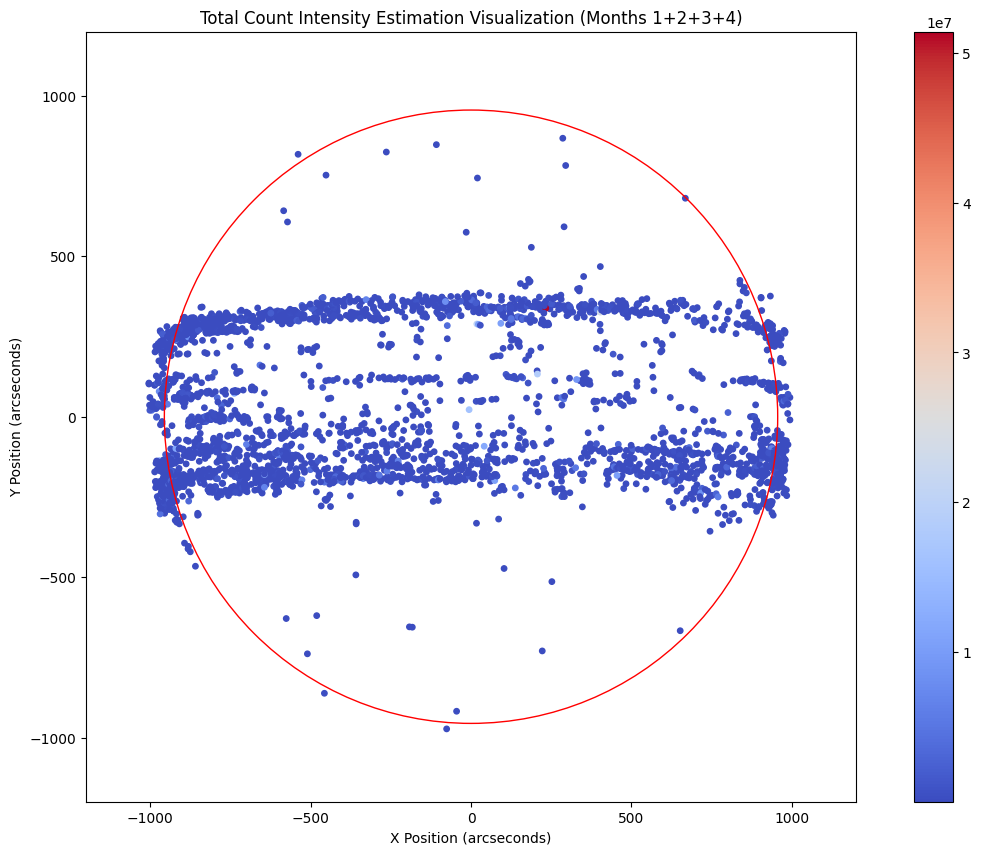

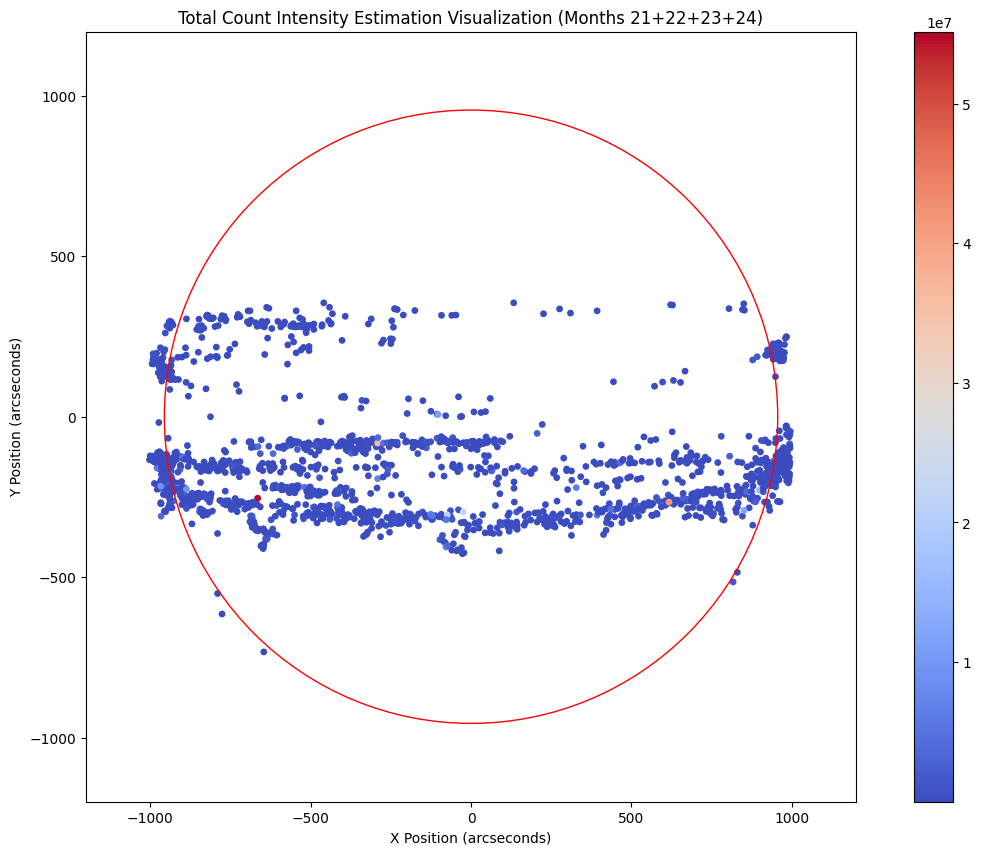

In [5]:
#makes a circle
r_1to4 = np.sqrt(batch01x ** 2 + batch01y ** 2)
t = 80  # percent
r0_1to4 = np.percentile(r_1to4, t)

#plots
plt.figure(figsize=(15, 10))
batch01ScatterPlot = plt.scatter(batch01x, batch01y, c=batch01TotalCount, cmap='coolwarm', s=15)
circle_1to4 = plt.Circle((0, 0), r0_1to4, color='r', fill=False)
plt.gca().add_artist(circle_1to4)
plt.colorbar(batch01ScatterPlot)
plt.title('Total Count Intensity Estimation Visualization (Months 1+2+3+4)')
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.xlim(-1200, 1200)
plt.ylim(-1200, 1200)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#plots
plt.figure(figsize=(15, 10))
batch02ScatterPlot = plt.scatter(batch02x, batch02y, c=batch02TotalCount, cmap='coolwarm', s=15)
circle_1to4 = plt.Circle((0, 0), r0_1to4, color='r', fill=False)
plt.gca().add_artist(circle_1to4)
plt.colorbar(batch02ScatterPlot)
plt.title('Total Count Intensity Estimation Visualization (Months 21+22+23+24)')
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.xlim(-1200, 1200)
plt.ylim(-1200, 1200)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

so here is the breakdown using a heat map

In [6]:
batch01x_max = str(batch01x.max())
batch01x_min = str(batch01x.min())
batch01y_max = str(batch01y.max())
batch01y_min = str(batch01y.min())

print("Maximum value of batch01x: " + batch01x_max)
print("Minimum value of batch01x: " + batch01x_min)
print("Maximum value of batch01y: " + batch01y_max)
print("Minimum value of batch01y: " + batch01y_min)

Maximum value of batch01x: 994
Minimum value of batch01x: -1004
Maximum value of batch01y: 868
Minimum value of batch01y: -973


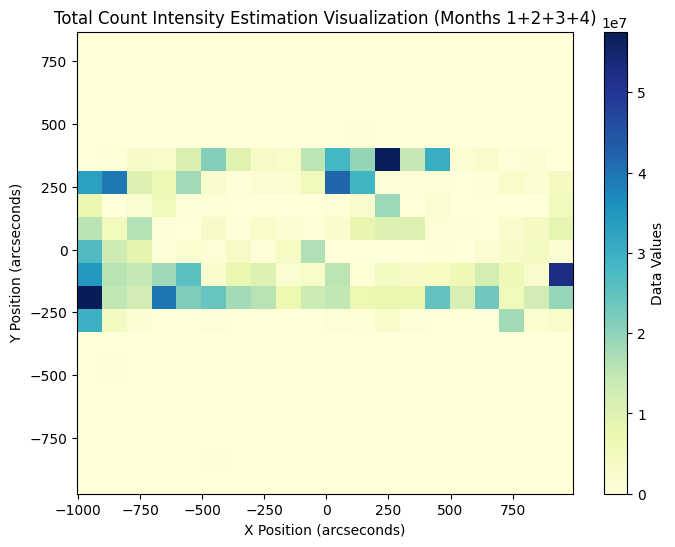

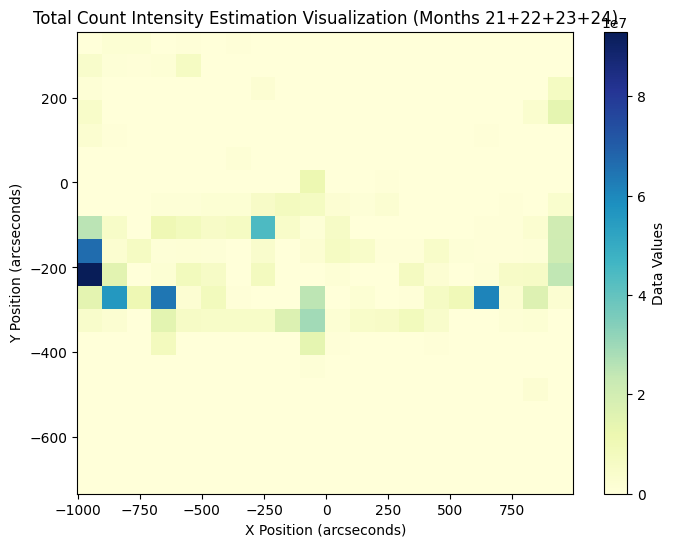

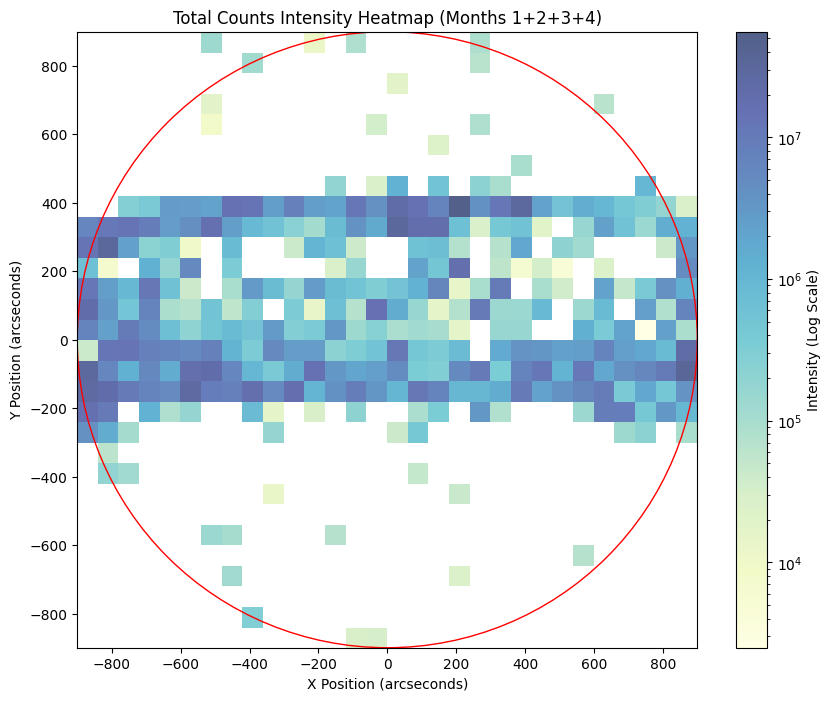

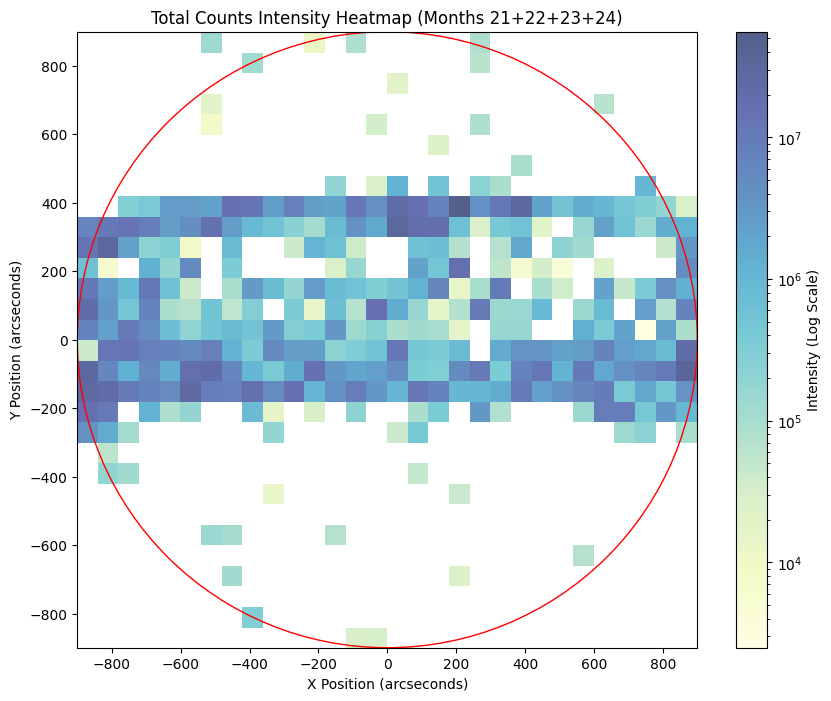

In [7]:
#batch01x, batch01y, c=batch01TotalCount, cmap='coolwarm',
from matplotlib.colors import LogNorm


xBins = 20 
yBins = 20
batch01HeatMap, batch01XEdges, batch01YEdges = np.histogram2d(batch01x, batch01y, bins=(xBins, yBins), weights=batch01TotalCount)

# Create extent for the heatmap
extent = [batch01XEdges[0], batch01XEdges[-1], batch01YEdges[0], batch01YEdges[-1]]

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(batch01HeatMap.T, extent=extent, origin='lower', aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Data Values')  # Add a colorbar for reference
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.title('Total Count Intensity Estimation Visualization (Months 1+2+3+4)')
plt.show()

batch02HeatMap, batch02XEdges, batch02YEdges = np.histogram2d(batch02x, batch02y, bins=(xBins, yBins), weights=batch02TotalCount)

# Create extent for the heatmap
extent = [batch02XEdges[0], batch02XEdges[-1], batch02YEdges[0], batch02YEdges[-1]]

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(batch02HeatMap.T, extent=extent, origin='lower', aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Data Values')  # Add a colorbar for reference
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.title('Total Count Intensity Estimation Visualization (Months 21+22+23+24)')
plt.show()

# batch01 new heatmap
circle_radius = 900  # Set the circle radius here

heatmap1, xedges1, yedges1 = np.histogram2d(batch01x, batch01y, bins=30, weights=batch01TotalCount)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
fig1, ax1 = plt.subplots(figsize=(10, 8))
sc1 = ax1.imshow(heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap='YlGnBu', alpha=0.7, norm=LogNorm())

ax1.set_title('Total Counts Intensity Heatmap (Months 1+2+3+4)')
ax1.set_xlabel('X Position (arcseconds)')
ax1.set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax1.add_artist(circle1)
cbar1 = fig1.colorbar(sc1, ax=ax1, label='Intensity (Log Scale)')

# batch02 new heatmap 
heatmap2, xedges2, yedges2 = np.histogram2d(batch02x, batch02y, bins=30, weights=batch02TotalCount)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
fig1, ax1 = plt.subplots(figsize=(10, 8))
sc1 = ax1.imshow(heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap='YlGnBu', alpha=0.7, norm=LogNorm())

ax1.set_title('Total Counts Intensity Heatmap (Months 21+22+23+24)')
ax1.set_xlabel('X Position (arcseconds)')
ax1.set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax1.add_artist(circle1)
cbar1 = fig1.colorbar(sc1, ax=ax1, label='Intensity (Log Scale)')

So now I am going to make 11 heatmaps

In [72]:

for index, row in set2.iterrows():
    if row['year'] == 2005:  # Assuming 'year' is one of your columns
        set2.at[index, 'month']= (row['month'] + 12)  # Modify the 'month' column
        


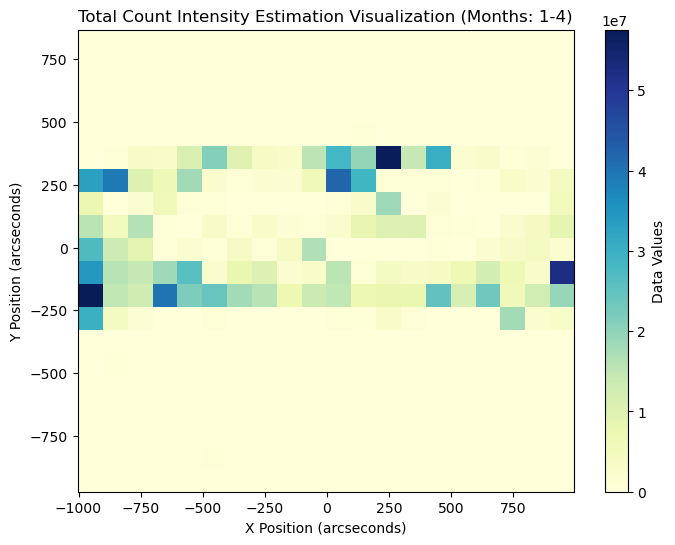

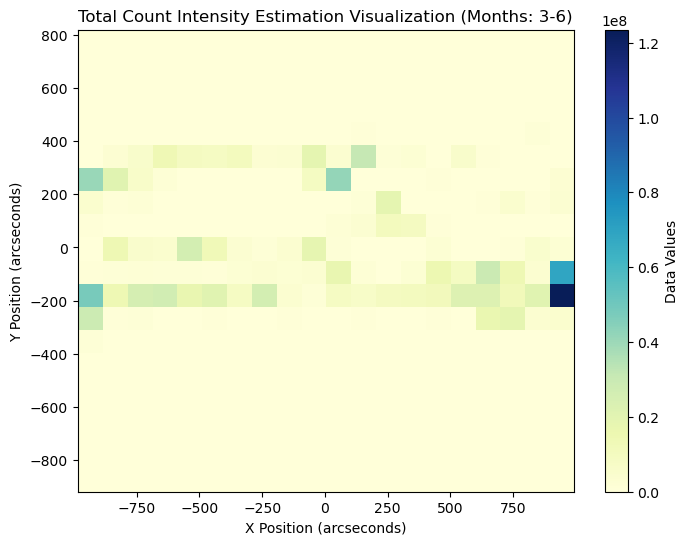

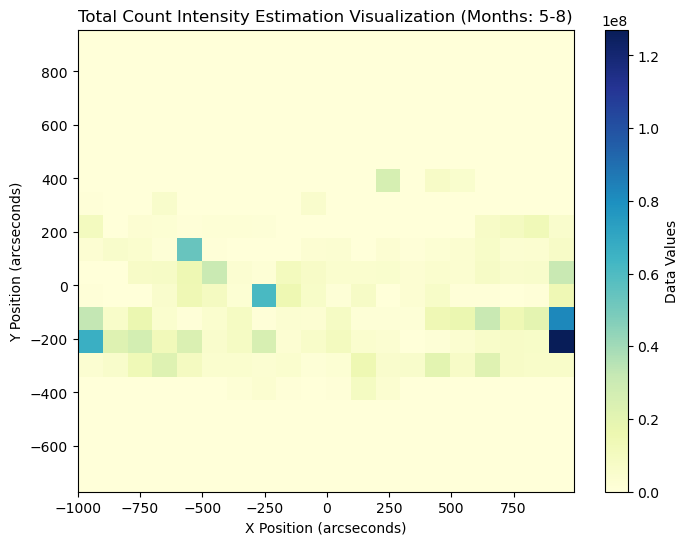

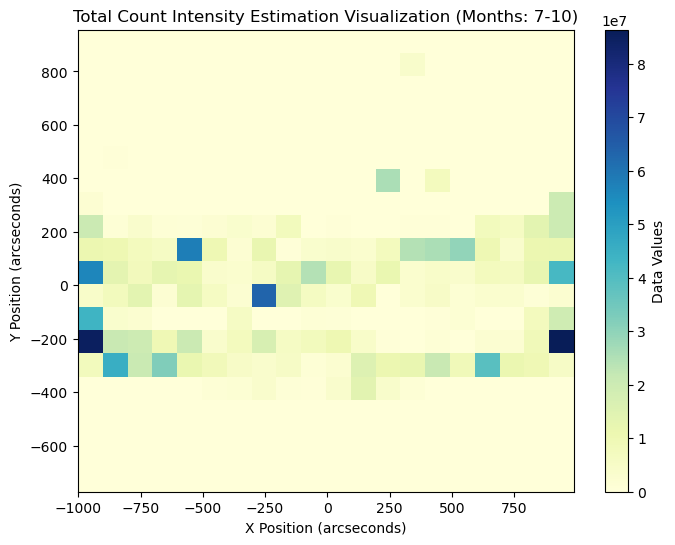

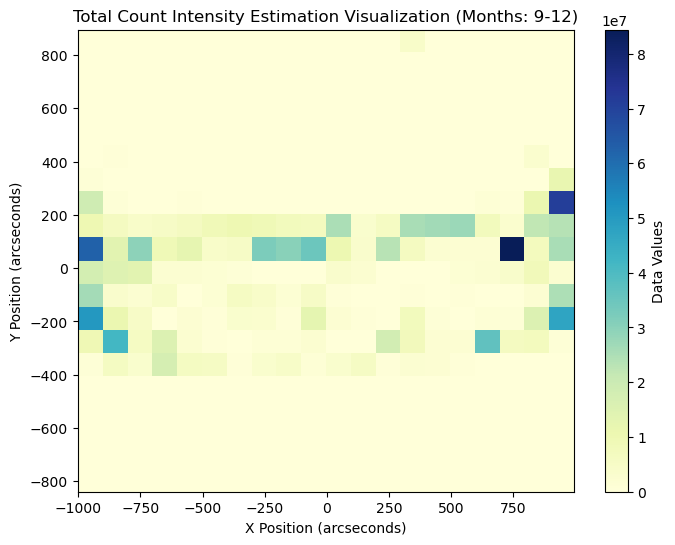

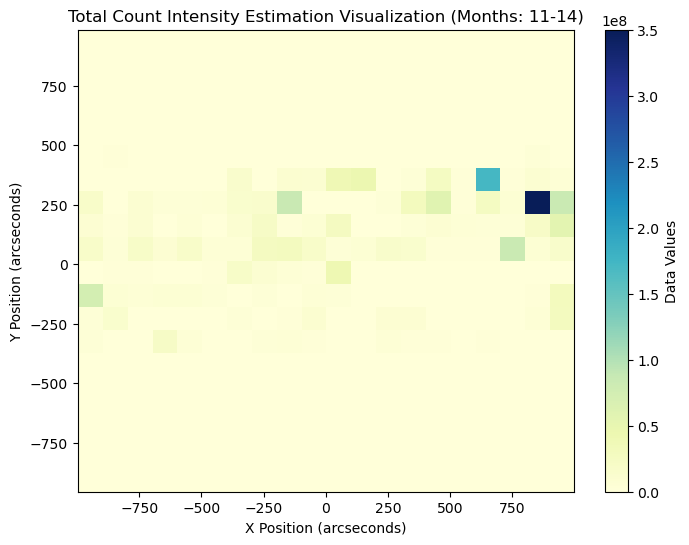

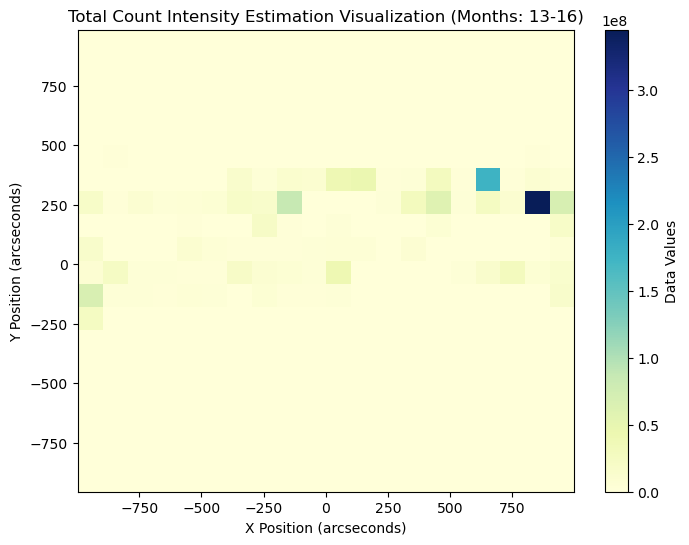

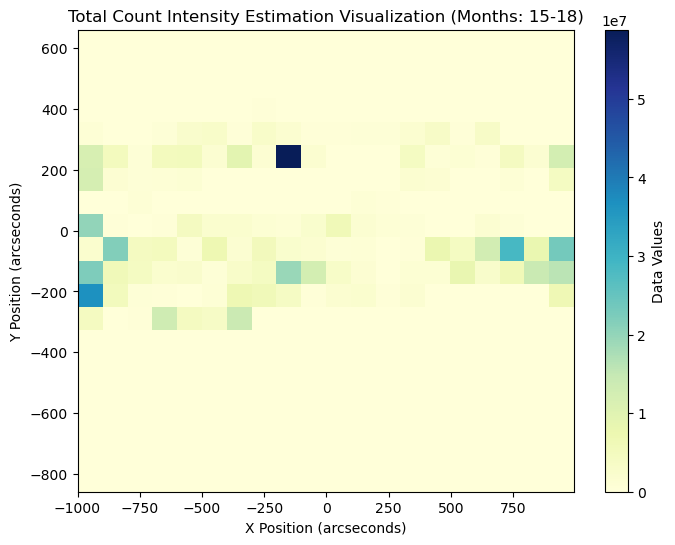

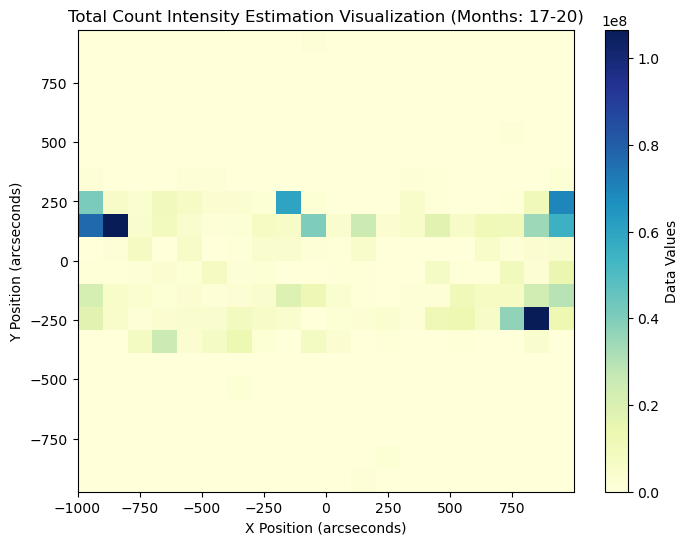

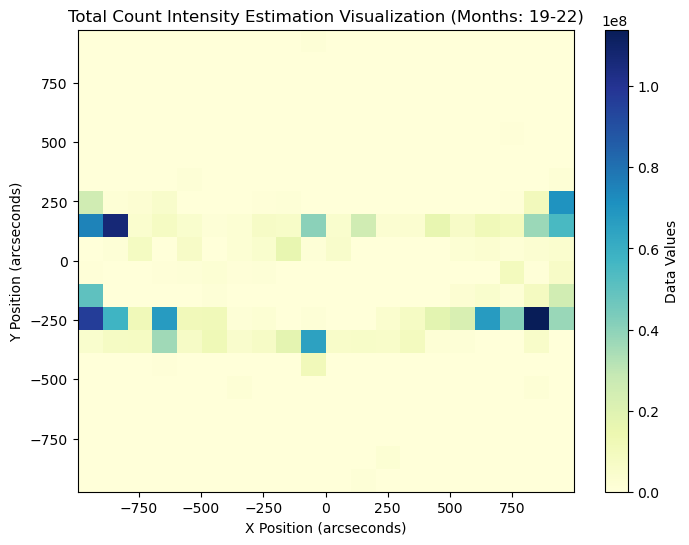

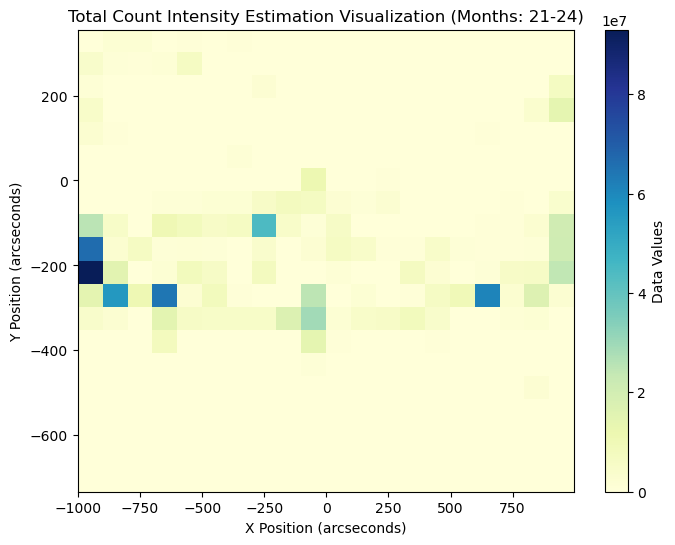

In [81]:
xBins = 20 
yBins = 20

months = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

for month in months:
    if month < 11:
        cond = ((set1['year'] == 2004) & (set1['month'].between(month, month+3)))
    elif month == 11:
        cond = ((set1['year'] == 2004) & (set1['month'].between(month, 12))) | ((set1['year'] == 2005) & (set1['month'].between(1, 2))) 
    else:
        cond = ((set1['year'] == 2005) & (set1['month'].between(month-12, month-9)))

    batch = set1[cond]
    batchX = batch['x.pos.asec'].values
    batchY = batch['y.pos.asec'].values
    batchTotalCount = batch['total.counts'].values

    batchHeatMap, batchXEdges, batchYEdges = np.histogram2d(batchX, batchY, bins=(xBins, yBins), weights=batchTotalCount)
    
    # Create extent for the heatmap
    extent = [batchXEdges[0], batchXEdges[-1], batchYEdges[0], batchYEdges[-1]]
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(batchHeatMap.T, extent=extent, origin='lower', aspect='auto', cmap='YlGnBu')
    plt.colorbar(label='Data Values')  # Add a colorbar for reference
    plt.xlabel('X Position (arcseconds)')
    plt.ylabel('Y Position (arcseconds)')
    plt.title('Total Count Intensity Estimation Visualization (Months: ' + str(month) + '-' + str(month+3) +')')
    plt.show()

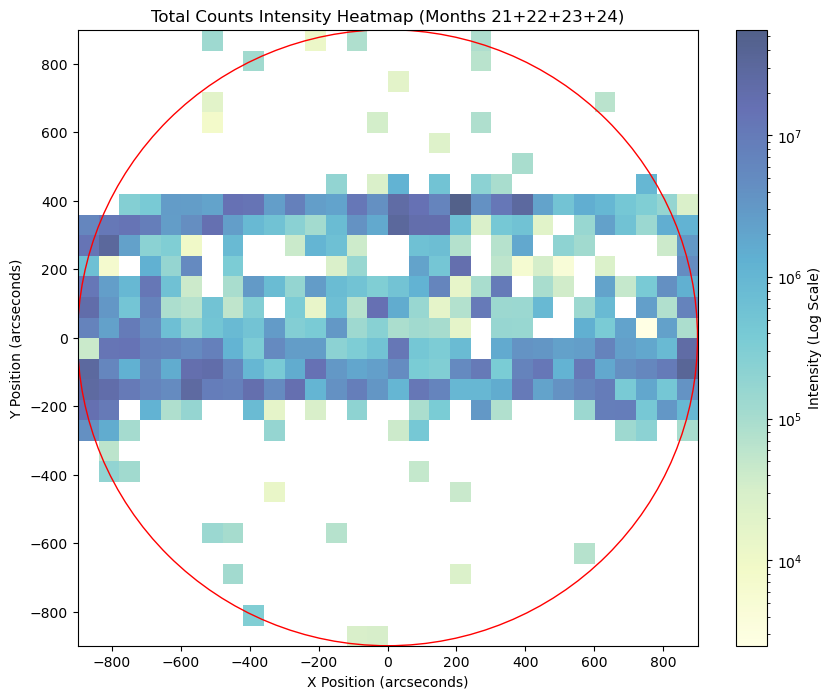

In [89]:
# I am gonna rebuild to get rid of what is happening in the top left corner
set1 = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")

cond02 = ((set1['year'] == 2005) & (set1['month'].between(9, 12)))
batch02 = set1[cond02]
batch02x = batch02['x.pos.asec'].values
batch02y = batch02['y.pos.asec'].values
batch02TotalCount = batch02['total.counts'].values

circle_radius = 900  # Set the circle radius here

heatmap2, xedges2, yedges2 = np.histogram2d(batch02x, batch02y, bins=30, weights=batch02TotalCount)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
fig1, ax1 = plt.subplots(figsize=(10, 8))
sc1 = ax1.imshow(heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap='YlGnBu', alpha=0.7, norm=LogNorm())

ax1.set_title('Total Counts Intensity Heatmap (Months 21+22+23+24)')
ax1.set_xlabel('X Position (arcseconds)')
ax1.set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax1.add_artist(circle1)
cbar1 = fig1.colorbar(sc1, ax=ax1, label='Intensity (Log Scale)')

codetime for task 3


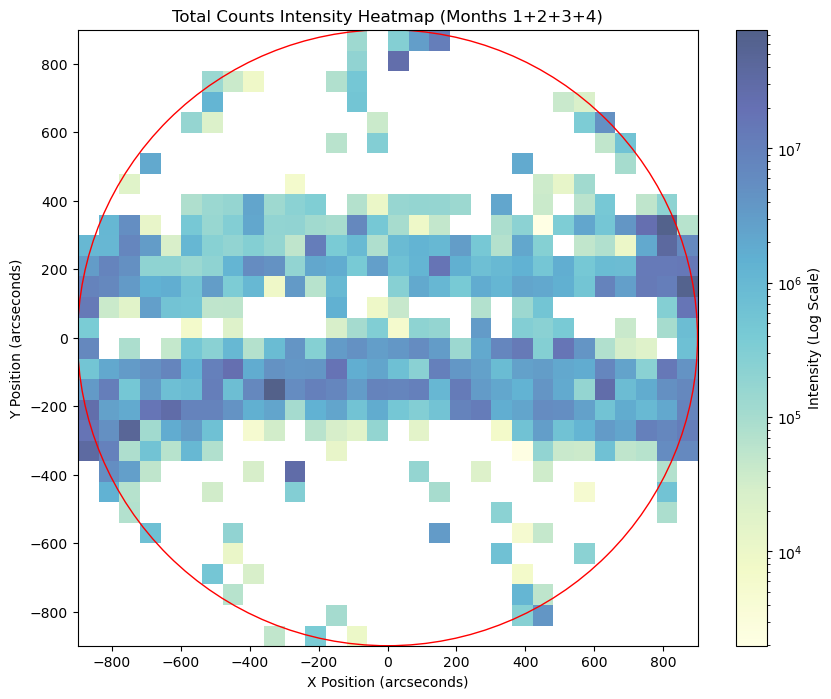

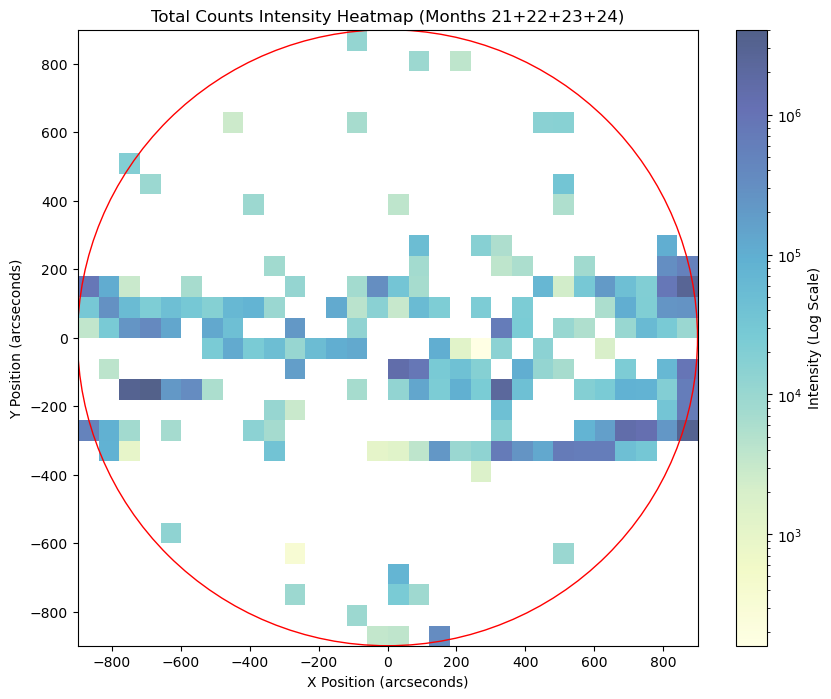

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

# Load dataset
dataSet2015_16 = pd.read_csv('Solar_flare_RHESSI_2015_16.csv')

# Set the circle radius
circle_radius = 900  # Set the circle radius here

# Filter data for months 1+2+3+4
batch01Cond = ((dataSet2015_16['year'] == 2015) & (dataSet2015_16['month'].between(1, 4)))
batch01DataSet = dataSet2015_16[batch01Cond]

batch01x = batch01DataSet['x.pos.asec'].values
batch01y = batch01DataSet['y.pos.asec'].values
batch01TotalCount = batch01DataSet['total.counts'].values

# Filter data for months 21+22+23+24
batch02Cond = ((dataSet2015_16['year'] == 2016) & (dataSet2015_16['month'].between(9, 12)))
batch02DataSet = dataSet2015_16[batch02Cond]

batch02x = batch02DataSet['x.pos.asec'].values
batch02y = batch02DataSet['y.pos.asec'].values
batch02TotalCount = batch02DataSet['total.counts'].values

# Create a heatmap for months 1+2+3+4 with a logarithmic color scale
heatmap1, xedges1, yedges1 = np.histogram2d(batch01x, batch01y, bins=30, weights=batch01TotalCount)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
fig1, ax1 = plt.subplots(figsize=(10, 8))
sc1 = ax1.imshow(heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap='YlGnBu', alpha=0.7, norm=LogNorm())

ax1.set_title('Total Counts Intensity Heatmap (Months 1+2+3+4)')
ax1.set_xlabel('X Position (arcseconds)')
ax1.set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax1.add_artist(circle1)
cbar1 = fig1.colorbar(sc1, ax=ax1, label='Intensity (Log Scale)')

# Create a heatmap for months 21+22+23+24 with a logarithmic color scale
heatmap2, xedges2, yedges2 = np.histogram2d(batch02x, batch02y, bins=30, weights=batch02TotalCount)
extent2 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
fig2, ax2 = plt.subplots(figsize=(10, 8))
sc2 = ax2.imshow(heatmap2.T, extent=extent2, origin='lower', aspect='auto', cmap='YlGnBu', alpha=0.7, norm=LogNorm())

ax2.set_title('Total Counts Intensity Heatmap (Months 21+22+23+24)')
ax2.set_xlabel('X Position (arcseconds)')
ax2.set_ylabel('Y Position (arcseconds)')
circle2 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax2.add_artist(circle2)
cbar2 = fig2.colorbar(sc2, ax=ax2, label='Intensity (Log Scale)')

plt.show()

going to try to find hotspots through hexagonal bins

needed 
    pip install esda
    pip install -U esda

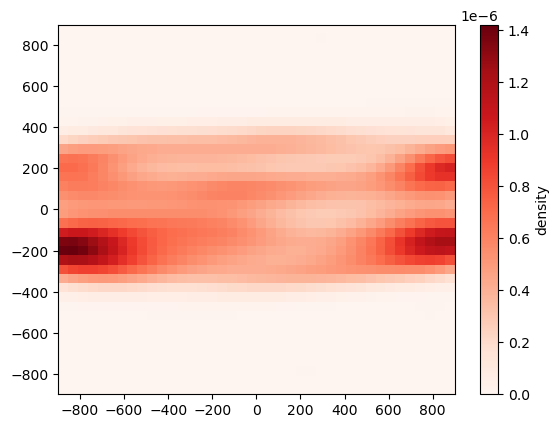

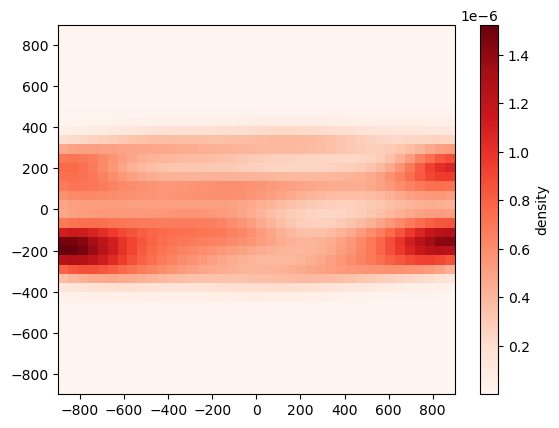

IndexError: single positional indexer is out-of-bounds

In [17]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Filter the data to include only observations with high total counts
d1 = 404476
d1Datafilter = df[df['total.counts'] >= d1]

d2 = 178746  
d2Datafilter = df[df['total.counts'] >= d2]

# Fit the KDE using the filtered data
d1Data = np.vstack([d1Datafilter['x.pos.asec'], d1Datafilter['y.pos.asec']])
d1Kde = gaussian_kde(d1Data)

d2Data = np.vstack([d2Datafilter['x.pos.asec'], d2Datafilter['y.pos.asec']])
d2Kde = gaussian_kde(d2Data)

# Evaluate on a regular grid
xgrid = np.linspace(-900, 900, 40)
ygrid = np.linspace(-900, 900, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

d1Z = d1Kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
d2Z = d2Kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(d1Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-900, 900, -900, 900],
           cmap='Reds')
cb = plt.colorbar()
cb.set_label("density")
plt.show()

plt.imshow(d2Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-900, 900, -900, 900],
           cmap='Reds')
cb = plt.colorbar()
cb.set_label("density")
plt.show()


df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Filter the data to include only observations with high total counts
high_count_threshold = 178746  # Adjust this threshold as needed
filtered_data = df[df['total.counts'] >= high_count_threshold]

# Fit the KDE using the filtered data
data = np.vstack([filtered_data['x.pos.asec'], filtered_data['y.pos.asec']])
kde = gaussian_kde(data)

# Evaluate on a regular grid
xgrid = np.linspace(-900, 900, 40)
ygrid = np.linspace(-900, 900, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Sort the density values and corresponding coordinates in descending order
sorted_density_indices = np.argsort(Z)[::-1]
sorted_density_values = Z[sorted_density_indices]
sorted_x_indices = Xgrid.ravel()[sorted_density_indices]
sorted_y_indices = Ygrid.ravel()[sorted_density_indices]

# Get the 11 highest density points
num_points_to_extract = 11
highest_density_x = sorted_x_indices[:num_points_to_extract]
highest_density_y = sorted_y_indices[:num_points_to_extract]

# Find the corresponding total counts for the highest density points
highest_density_total_counts = []
for x, y in zip(highest_density_x, highest_density_y):
    closest_data_point = filtered_data.iloc[(((filtered_data['x.pos.asec'] - x) ** 2 + (filtered_data['y.pos.asec'] - y) ** 2).idxmin())]
    highest_density_total_counts.append(closest_data_point['total.counts'])

# Output the results in descending order of density
for i, (x, y, count) in enumerate(zip(highest_density_x, highest_density_y, highest_density_total_counts), start=1):
    print(f"Point {i}: (x = {x}, y = {y}), Total Count = {count}, Density = {sorted_density_values[i-1]}")



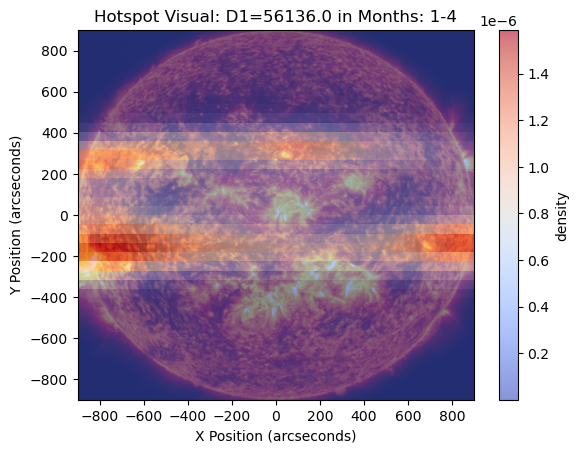

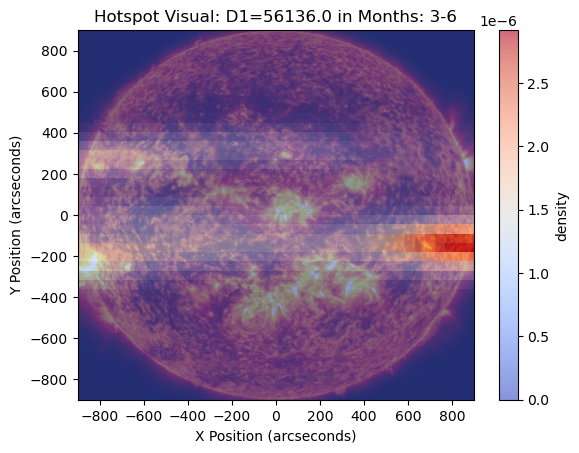

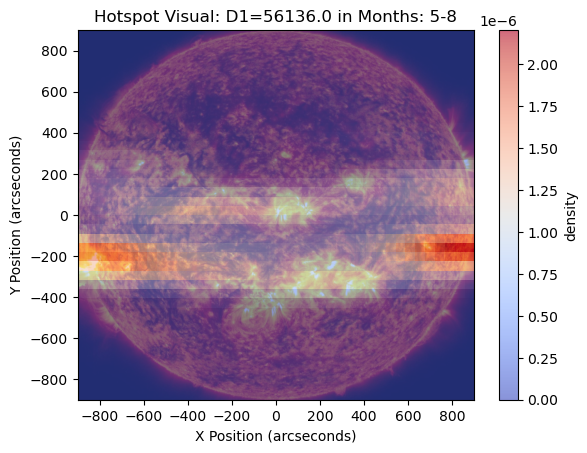

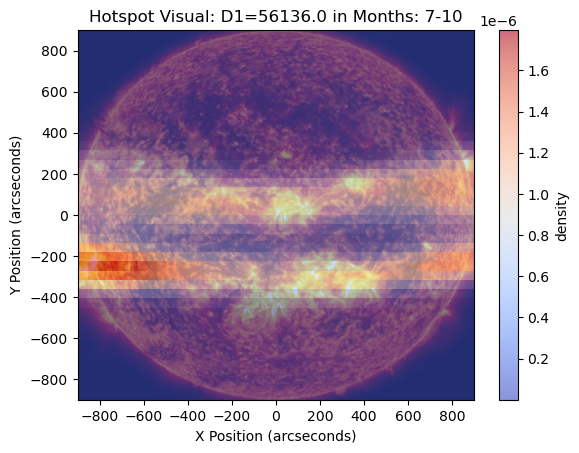

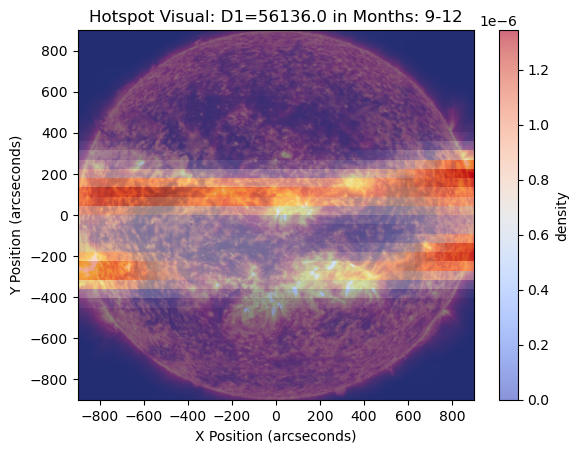

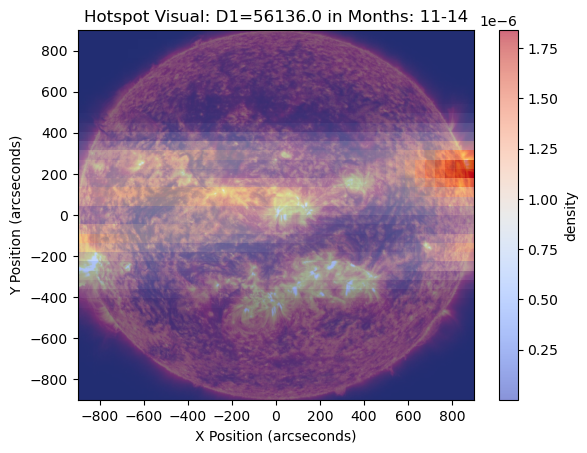

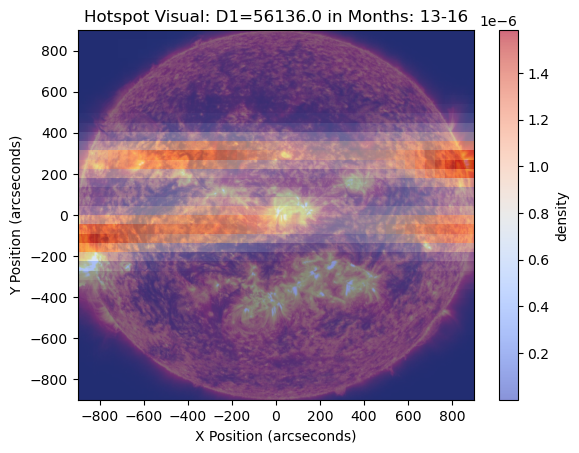

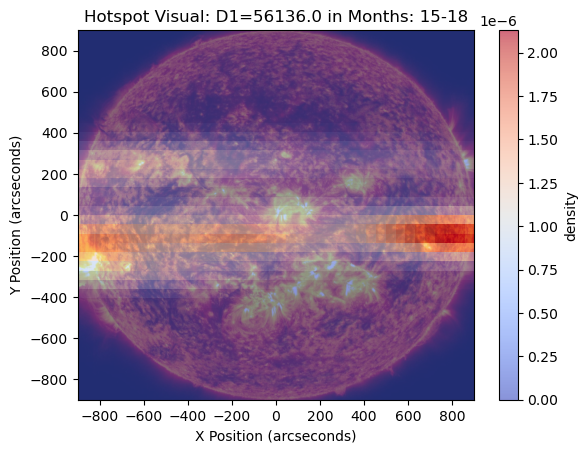

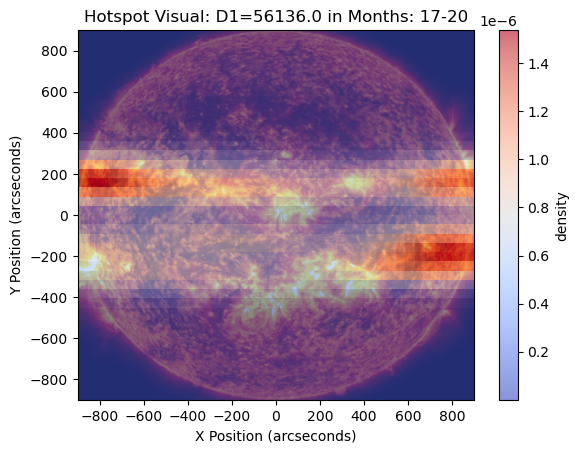

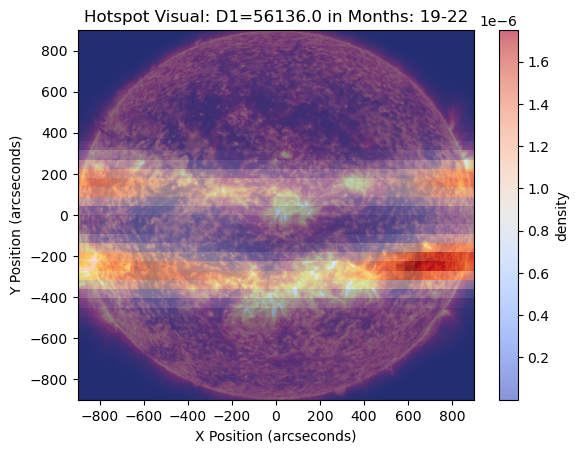

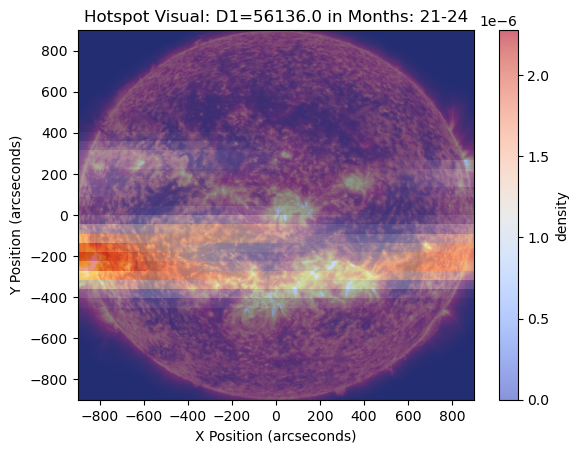

In [47]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

# read data file and set d1
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')
d1 = np.percentile(df['total.counts'], 50)                

# iterate through the begining month of every batch
months = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
for month in months:
    if month < 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, month+3)))
    elif month == 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, 12))) | ((df['year'] == 2005) & (df['month'].between(1, 2))) 
    else:
        cond = ((df['year'] == 2005) & (df['month'].between(month-12, month-9)))

    # separate out batch data and create kde
    batch = df[cond]
    batchFilter = batch[batch['total.counts'] >= d1]
    data = np.vstack([batchFilter['x.pos.asec'], batchFilter['y.pos.asec']])
    kde = gaussian_kde(data)

    # create a gridspace and evaluate kde
    xgrid = np.linspace(-900, 900, 40)
    ygrid = np.linspace(-900, 900, 40)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

    # insert image of the sun as the background
    sunBackground = mpimg.imread('sun.jpg')
    plt.imshow(sunBackground, extent=[-900, 900, -900, 900], aspect='auto')

    # plot the hotspots
    plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=[-900, 900, -900, 900],
            cmap='coolwarm', 
            alpha=.6)
    cb = plt.colorbar()
    cb.set_label("density")

    plt.xlabel('X Position (arcseconds)')
    plt.ylabel('Y Position (arcseconds)')
    plt.title('Hotspot Visual: D1=' + str(d1) + ' in Months: ' + str(month) + '-' + str(month+3))
    plt.show()


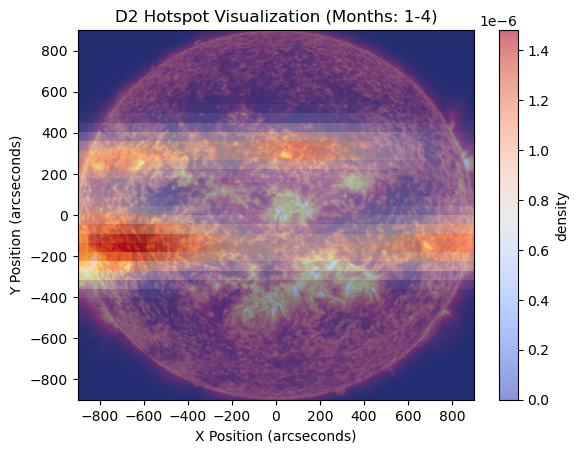

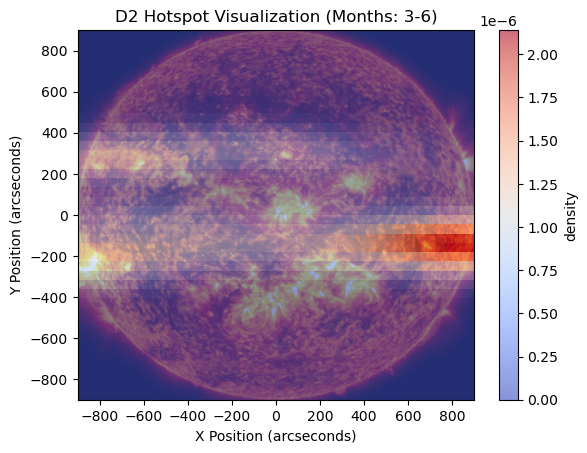

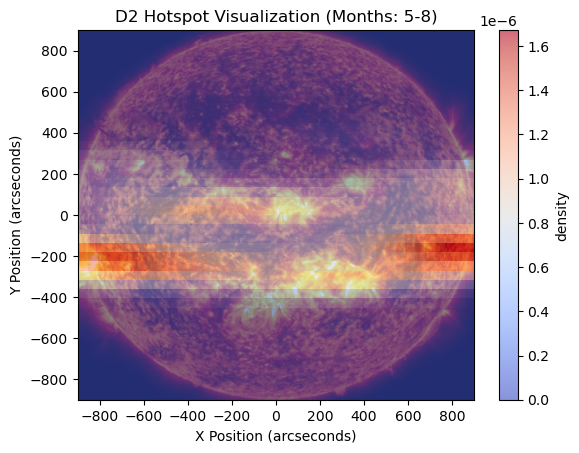

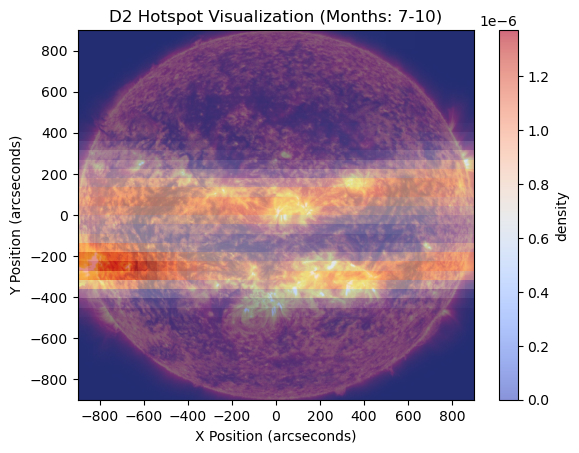

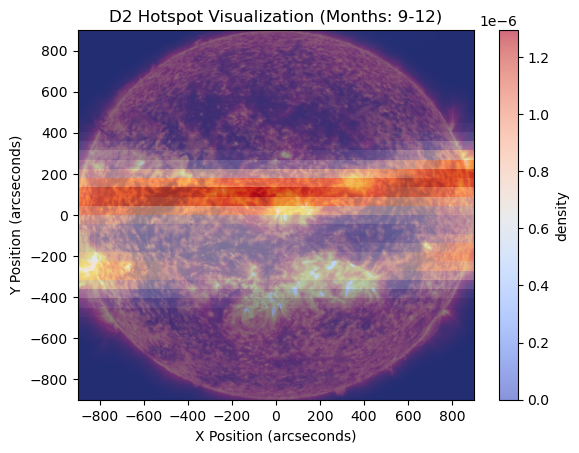

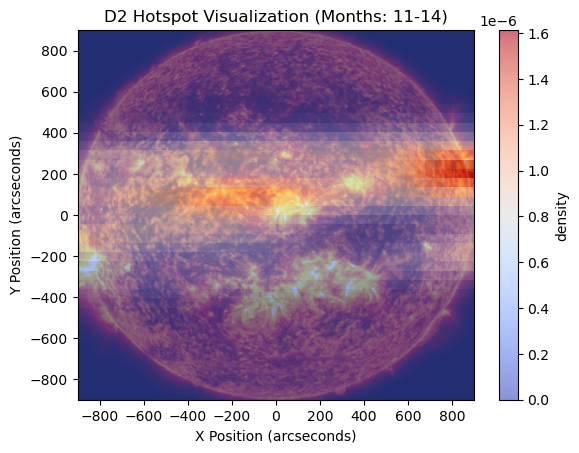

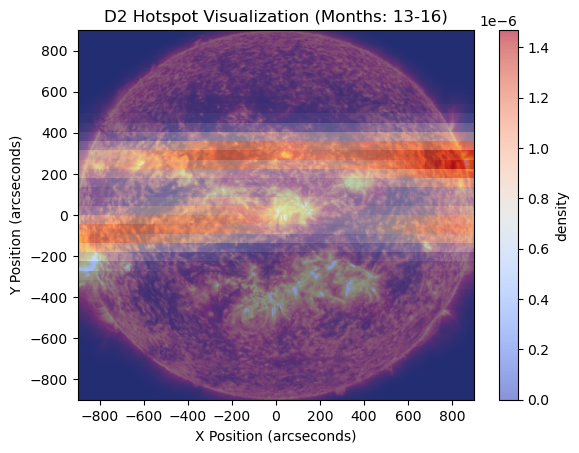

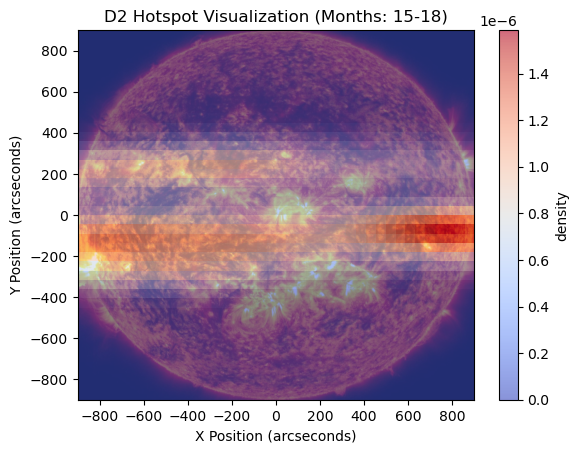

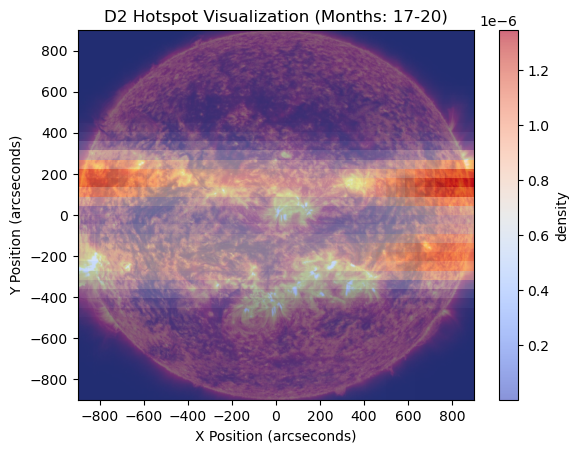

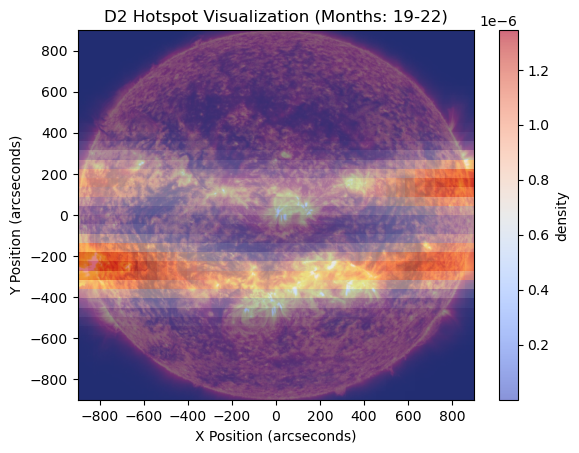

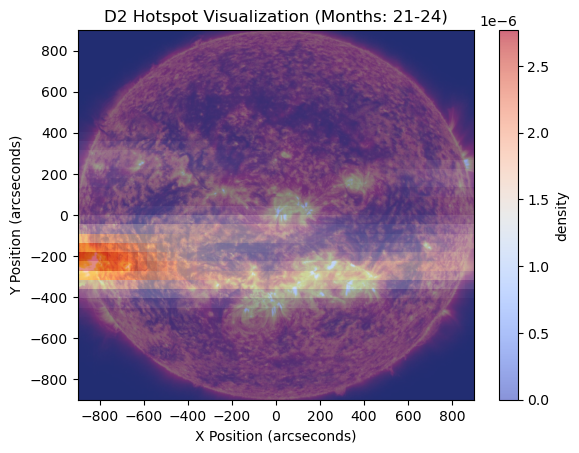

In [45]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

months = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
xBins = 20 
yBins = 20

df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')
d2 = np.percentile(df['total.counts'], 85)
high_count_threshold = d2  # the 85th percentile

for month in months:
    if month < 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, month+3)))
    elif month == 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, 12))) | ((df['year'] == 2005) & (df['month'].between(1, 2))) 
    else:
        cond = ((df['year'] == 2005) & (df['month'].between(month-12, month-9)))

    batch = df[cond]
    filtered_data = batch[batch['total.counts'] >= high_count_threshold]
    data = np.vstack([filtered_data['x.pos.asec'], filtered_data['y.pos.asec']])
    
    kde = gaussian_kde(data)

    xgrid = np.linspace(-900, 900, 40)
    ygrid = np.linspace(-900, 900, 40)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

    # Plot the result as an image
    background_image = mpimg.imread('sun.jpg')
    plt.imshow(background_image, extent=[-900, 900, -900, 900], aspect='auto')

    plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=[-900, 900, -900, 900],
            cmap='coolwarm', 
            alpha=.6)
    cb = plt.colorbar()
    cb.set_label("density")

    plt.xlabel('X Position (arcseconds)')
    plt.ylabel('Y Position (arcseconds)')
    plt.title('D2 Hotspot Visualization (Months: ' + str(month) + '-' + str(month+3) +')')
    plt.show()
